Request necessary library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression


<h2>Importing Data Sets</h2>

In [2]:
file_name = 'kc_house_data.csv'

In [3]:
df = pd.read_csv(file_name)

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503



Disply the data types of each columns

In [5]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Data Wrangling

In [7]:
# Drop the columns "id"
df.drop(['id'],axis=1,inplace = True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [9]:
df_isnull = df.isnull()
df_isnull.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
for column in df_isnull.columns.values.tolist():
    print(column)
    print(df_isnull[column].value_counts())
    print("")

date
False    21613
Name: date, dtype: int64

price
False    21613
Name: price, dtype: int64

bedrooms
False    21613
Name: bedrooms, dtype: int64

bathrooms
False    21613
Name: bathrooms, dtype: int64

sqft_living
False    21613
Name: sqft_living, dtype: int64

sqft_lot
False    21613
Name: sqft_lot, dtype: int64

floors
False    21613
Name: floors, dtype: int64

waterfront
False    21613
Name: waterfront, dtype: int64

view
False    21613
Name: view, dtype: int64

condition
False    21613
Name: condition, dtype: int64

grade
False    21613
Name: grade, dtype: int64

sqft_above
False    21613
Name: sqft_above, dtype: int64

sqft_basement
False    21613
Name: sqft_basement, dtype: int64

yr_built
False    21613
Name: yr_built, dtype: int64

yr_renovated
False    21613
Name: yr_renovated, dtype: int64

zipcode
False    21613
Name: zipcode, dtype: int64

lat
False    21613
Name: lat, dtype: int64

long
False    21613
Name: long, dtype: int64

sqft_living15
False    21613
Name: sqft_livi

From checking NaN value in each column. Datafram don't have any sigle NaN value. In the other hand if the dataframe contain the NaN value it can replace with the avarage of each column.

## Exploratory Data Analysis

In [11]:
x = df[['sqft_living']]
y = df['price']

In [12]:
def DistributionPlot(RedFunction, BlurFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figure = (width,height))
    
    ax1 = sns.distplor(Red)

<AxesSubplot:xlabel='waterfront', ylabel='price'>

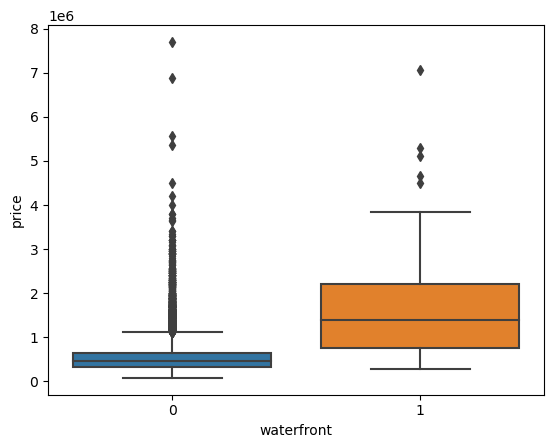

In [13]:
sns.boxplot(x='waterfront',y='price',data = df)

Fron the box plot you can see if the house has waterfront, the price will higher than without waterfront.

<AxesSubplot:>

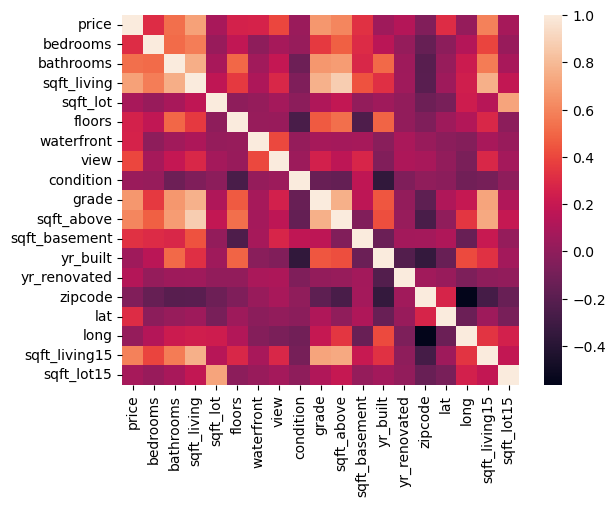

In [14]:
# correlation between 'price' and 'sqft_above' is postitive
sns.heatmap(df.corr())

In [15]:
# Correlation each features with price
df.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

The correlation value that will impact significantly to the price have to nore then 0.5.

In [16]:
from sklearn.metrics import r2_score

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
# Select only features that have corelection value > 0,5
x_eff_features = df[['sqft_living','grade','sqft_above','sqft_living15','bathrooms']]

In [19]:
# split train and test data for enhance predictor
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_eff_features,y,test_size=0.2, random_state = 7)

print('shape of train value',x_train1.shape)
print('shape of test value',x_test1.shape)

shape of train value (17290, 5)
shape of test value (4323, 5)


## Simple Linear Regression

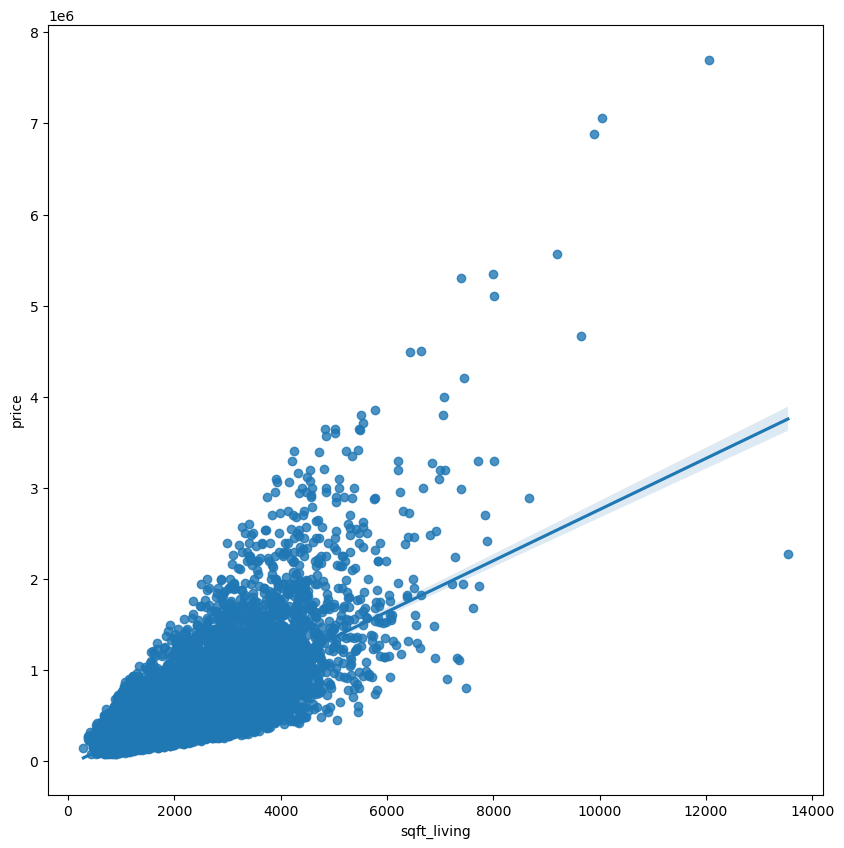

In [20]:
width = 10
height = 10
plt.figure(figsize=(width,height))
sns.regplot(x=df['sqft_living'],y=df[['price']])
plt.show()

In [21]:
lm_living_SLR = LinearRegression()
lm_living_SLR.fit(x_train1[['sqft_living']],y_train1)
RR_SLR = lm_living_SLR.score(x_test1[['sqft_living']],y_test1) #R^2 of the SLR
print('R^2 value from Simple Linear Regression : ', RR_SLR)

R^2 value from Simple Linear Regression :  0.4832715584837527


Correlation value that be significate for be prrdictor should be Correlation Value > 0.5.

### Cross-Validation Score SLR

In [22]:
from sklearn.model_selection import cross_val_score

In [23]:
Rcross_SLR = cross_val_score(lm_living_SLR, x_train1[['sqft_living']], y_train1, cv=10)
Rcross_SLR

array([0.49301556, 0.49243323, 0.52569855, 0.51438058, 0.52262195,
       0.44942611, 0.48182158, 0.45619412, 0.4920723 , 0.49593602])

In [24]:
print("The mean of the folds are", Rcross_SLR.mean(), "and the standard deviation is", Rcross_SLR.std())

The mean of the folds are 0.4923599986485237 and the standard deviation is 0.024057856680925818


R^2 value from Cross-Validation Score is more then 0.5 it means this value is significate. Bur fron the SLR Cross-Validation in less than 0.5.

## Multiple Linear Regression

In [25]:
lr_x_eff = LinearRegression()
lr_x_eff.fit(x_train1,y_train1)
RR_MLR = lr_x_eff.score(x_test1,y_test1) #R^2 of the MLR
print('R^2 value from Simple Linear Regression : ', RR_MLR)

R^2 value from Simple Linear Regression :  0.5376499916783248


### Cross-Validation Score MLR

In [26]:
Rcross_MLR = cross_val_score(lr_x_eff, x_train1, y_train1, cv=10)
Rcross_MLR

array([0.54590419, 0.55494563, 0.54396237, 0.55643849, 0.57036055,
       0.52016983, 0.53137666, 0.51793626, 0.55432129, 0.53876184])

In [27]:
print("The mean of the folds are", Rcross_MLR.mean(), "and the standard deviation is", Rcross_MLR.std())

The mean of the folds are 0.5434177110564671 and the standard deviation is 0.01584345172402692


### Distribution Visualization 

In [28]:
Y_hat = lr_x_eff.predict(x_train1)

In [29]:
Y_hat

array([618070.8006248 , 636977.74093859, 802492.89012127, ...,
       650626.14234105, 781357.50628597, 319967.87118861])

C:\Users\ASUS_simon\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS_simon\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


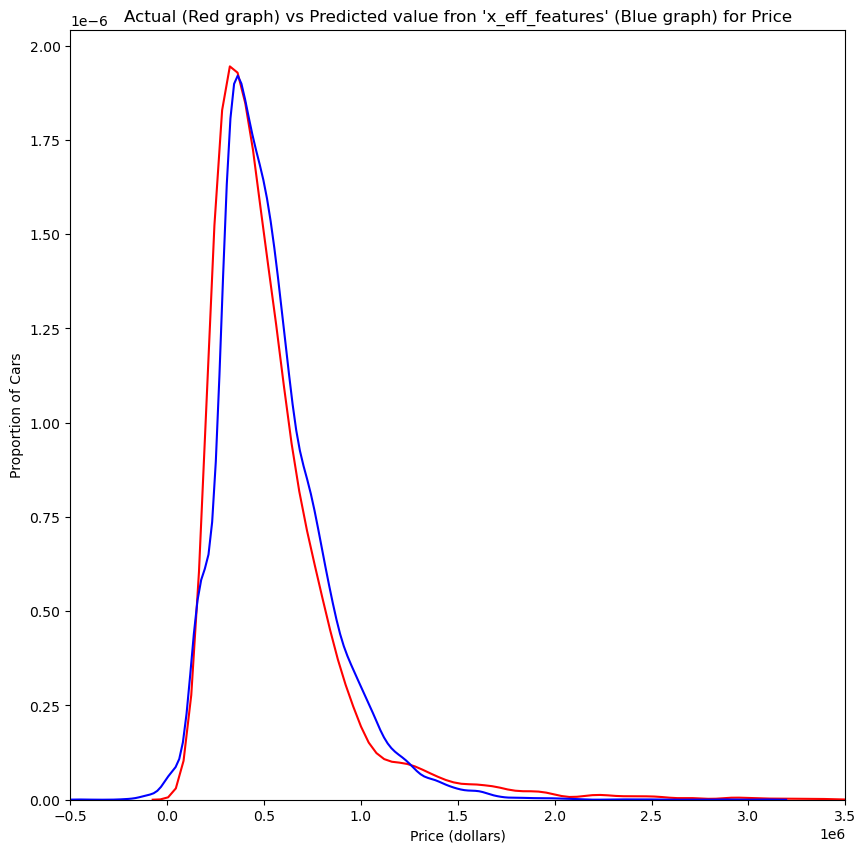

In [30]:
plt.figure(figsize = (width,height))

ax1=sns.distplot(y,hist=False,color='r',label="Actual value")
sns.distplot(Y_hat,hist=False,color='b',label='Predicted Value')

plt.title('Actual (Red graph) vs Predicted value fron \'x_eff_features\' (Blue graph) for Price')
plt.xlabel('Price (dollars)')
plt.ylabel('Proportion of Cars')
plt.xlim(-1000000/2,3500000)


plt.show()
plt.close()

From the distribution graph as you can see on above. prediction graph resonably look similar with actual value.

## Polynomial

### Find the best degree for apply in Polynomial Model

Text(0.5, 1.0, 'R^2 Using Test Data')

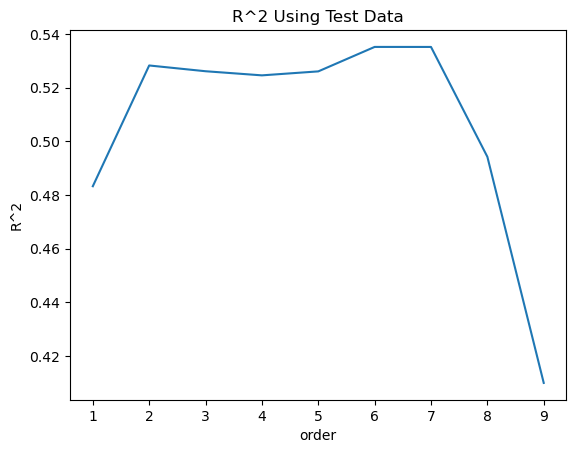

In [31]:
lr_poly = LinearRegression()

Rsqu_test = []

order = [1,2,3,4,5,6,7,8,9]

for n in order:

    pr = PolynomialFeatures(degree = n)
    x_train1_pr = pr.fit_transform(x_train1[["sqft_living"]])
    x_test1_pr = pr.fit_transform(x_test1[["sqft_living"]])
    
    lr_poly.fit(x_train1_pr,y_train1) # Polynomial each degree Model 
    
    Rsqu_test.append(lr_poly.score(x_test1_pr,y_test1))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')

In [32]:
print('Index degree that got highest R^2 value is :',Rsqu_test.index(max(Rsqu_test))+1,'\nR^2 Value',Rsqu_test[Rsqu_test.index(max(Rsqu_test))])

Index degree that got highest R^2 value is : 6 
R^2 Value 0.5351325684470158


This graph show us maximum of the R^2 value in each difference order. And the Maximum order is order = 3

### Plot Polynomial Degree = 3 Model

In [33]:
f_order_3 = np.polyfit(x_train1['sqft_living'],y_train1,3) #This model doesn't use train_test_split
p_order_3 = np.poly1d(f_order_3)
print(p_order_3)

            3           2
-4.194e-06 x + 0.09123 x - 103.7 x + 3.477e+05


In [34]:
def PlotPolly_1(model, independent_var, dependent_var, name):
    x_new=np.linspace(0,14000,100)
    y_new=model(x_new)
    
    plt.plot(independent_var, dependent_var, '.', x_new, y_new,'-')
    plt.title('Polynomial Fit with Matplotlib for Price')
    ax=plt.gca()
    ax.set_facecolor((0.898,0.898,0.898))
    fig=plt.gcf()
    plt.xlabel(name)
    plt.ylabel('Price of Hourse')
    
    plt.show()
    plt.close()

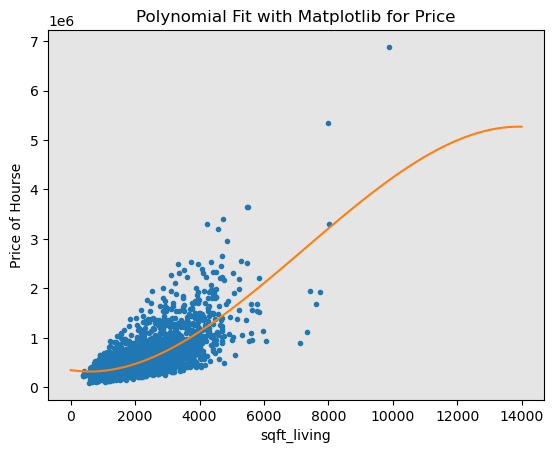

In [35]:
PlotPolly_1(p_order_3, x_test1['sqft_living'], y_test1, 'sqft_living')

In [36]:
r_squared_poly_3 = r2_score(y_test1,p_order_3(x_test1['sqft_living'])) # p is a coeffcient of polynomial equation
print('The R-square value is: ', r_squared_poly_3)

The R-square value is:  0.5260814917251495


### Cross-Validation Score Polynomial

#### Create polynomial with degree = 3

In [37]:
lr_poly_3 = LinearRegression()
pr_de_3 = PolynomialFeatures(degree = 3)

x_train1_pr_de_3 = pr_de_3.fit_transform(x_train1[["sqft_living"]])
x_test1_pr_de_3 = pr_de_3.fit_transform(x_test1[["sqft_living"]])

lr_poly_3.fit(x_train1_pr_de_3, y_train1)

LinearRegression()

In [38]:
Rcross_poly_de_3 = cross_val_score(lr_poly_3, x_test1_pr_de_3, y_test1, cv=10)
Rcross_poly_de_3

array([0.41031281, 0.48114223, 0.56542862, 0.55944224, 0.44240556,
       0.39171178, 0.46317327, 0.51602422, 0.51802454, 0.56643022])

In [39]:
print("The mean of the folds are", Rcross_poly_de_3.mean(), "and the standard deviation is", Rcross_poly_de_3.std())

The mean of the folds are 0.4914095503539941 and the standard deviation is 0.06072069906729988


## Multivariate Polynomial Function

In [40]:
x_eff_features.head()

,sqft_living,grade,sqft_above,sqft_living15,bathrooms
0,1180,7,1180,1340,1.00
1,2570,7,2170,1690,2.25
2,770,6,770,2720,1.00
3,1960,7,1050,1360,3.00
4,1680,8,1680,1800,2.00


In [41]:
x_train1.head()

,sqft_living,grade,sqft_above,sqft_living15,bathrooms
20046,2480,8,2480,2510,2.50
7278,2060,8,1050,2690,2.50
13226,2800,9,2800,3400,2.50
6832,1950,7,1120,2000,2.50
21131,3030,8,3030,3030,2.75


In [42]:
from sklearn.preprocessing import PolynomialFeatures as PolyFeat

In [43]:
#set the x teain and x test in polynomial with 3 order
pr_mul_de_3 = PolynomialFeatures(degree = 3)
x_train1_mul_de_3_pr = pr_mul_de_3.fit_transform(x_train1)
x_test1_mul_de_3_pr = pr_mul_de_3.fit_transform(x_test1)
pr_mul_de_3

PolynomialFeatures(degree=3)

In [44]:
# Create equation
poly_mul_de_3 = LinearRegression()
poly_mul_de_3.fit(x_train1_mul_de_3_pr,y_train1)

LinearRegression()

In [46]:
#Predict value
#y_hat = poly.predict(x_test1_mul_de_3_pr)
#y_hat[0:5]

In [47]:
print('Polynomial R^2 value with 3 order :',poly_mul_de_3.score(x_test1_mul_de_3_pr,y_test1)) # This polynimial differ from the above one by the below use x_train1

Polynomial R^2 value with 3 order : 0.623963746506982


Text(0.5, 1.0, 'R^2 Using Test Data')

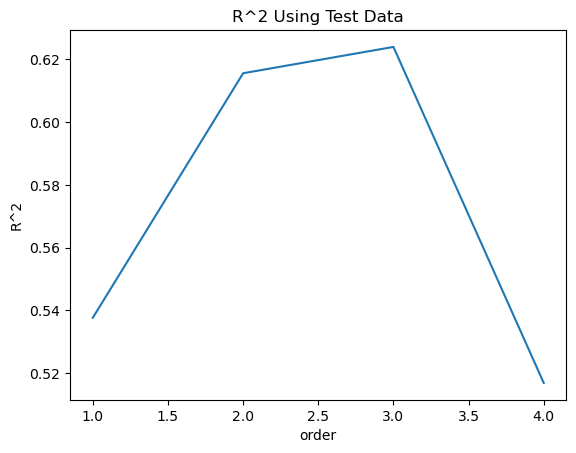

In [48]:
lr_test_degree = LinearRegression()

Rsqu_test_degree = []

order = [1,2,3,4]

for n in order:

    pr = PolynomialFeatures(degree = n)
    x_train_test_pr = pr.fit_transform(x_train1)
    x_test_pr = pr.fit_transform(x_test1)
    
    lr_test_degree.fit(x_train_test_pr,y_train1)
    
    Rsqu_test_degree.append(lr_test_degree.score(x_test_pr,y_test1))

plt.plot(order, Rsqu_test_degree)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')

In [49]:
print('Index degree that got highest R^2 value is :',Rsqu_test_degree.index(max(Rsqu_test_degree))+1,'\nR^2 Value',Rsqu_test_degree[Rsqu_test_degree.index(max(Rsqu_test_degree))])

Index degree that got highest R^2 value is : 3 
R^2 Value 0.623963746506982


Checking the R^2 value to find the highest degree

### Cross-Validation Score Multivariate Polynomial Function

In [164]:
# revise cross-validation score

# Create multipolynomial that have degree = 3
pr_degree_3 = PolynomialFeatures(degree = 3)
lr_multi_poly_degree_3 = LinearRegression() 

x_train_pr_degree_3 = pr_degree_3.fit_transform(x_train1)
x_test_pr_degree_3 = pr_degree_3.fit_transform(x_test1)
lr_multi_poly_degree_3.fit(x_train_pr_degree_3,y_train1)

lr_multi_poly_degree_3.score(x_test_pr_degree_3,y_test1)

0.623963746506982

In [156]:
Rcross_Mul_poly = cross_val_score(lr_multi_poly_degree_3, x_test_pr_degree_3, y_test1, cv=10)
Rcross_Mul_poly

array([0.51418746, 0.61337076, 0.5960352 , 0.63775947, 0.59737519,
       0.28580732, 0.53561893, 0.61130202, 0.5609819 , 0.76232175])

In [157]:
print("The mean of the folds are", Rcross_Mul_poly.mean(), "and the standard deviation is", Rcross_Mul_poly.std())

The mean of the folds are 0.5714759984334863 and the standard deviation is 0.11476725601489633


### Test apply ridge regression

In [196]:
from sklearn.linear_model import Ridge

In [197]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data and transform the training data
x_train1_mul_de_3_scaled = scaler.fit_transform(x_train1)

# Transform the test data using the fitted scaler
x_test1_mul_de_3_scaled = scaler.transform(x_test1)


In [200]:
# Tranform z-score value into polynomial equation
# for prevent the warning that the matrix used in the computation 
#may be near singular or badly conditioned, 
#which can lead to inaccurate results

Multivarpoly = PolynomialFeatures()

x_train1_mul_de_3_pr_scaled = Multivarpoly.fit_transform(x_train1_mul_de_3_scaled)
x_test1_mul_de_3_pr_scaled = Multivarpoly.transform(x_test1_mul_de_3_scaled)


In [215]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10*np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha = alpha)
    RigeModel.fit(x_train1_mul_de_3_pr_scaled, y_train1)
    test_score, train_score = RigeModel.score(x_test1_mul_de_3_pr_scaled, y_test1), RigeModel.score(x_train1_mul_de_3_pr_scaled,y_train1)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})
    
    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:10<00:00, 94.15it/s, Test Score=0.583, Train Score=0.589]


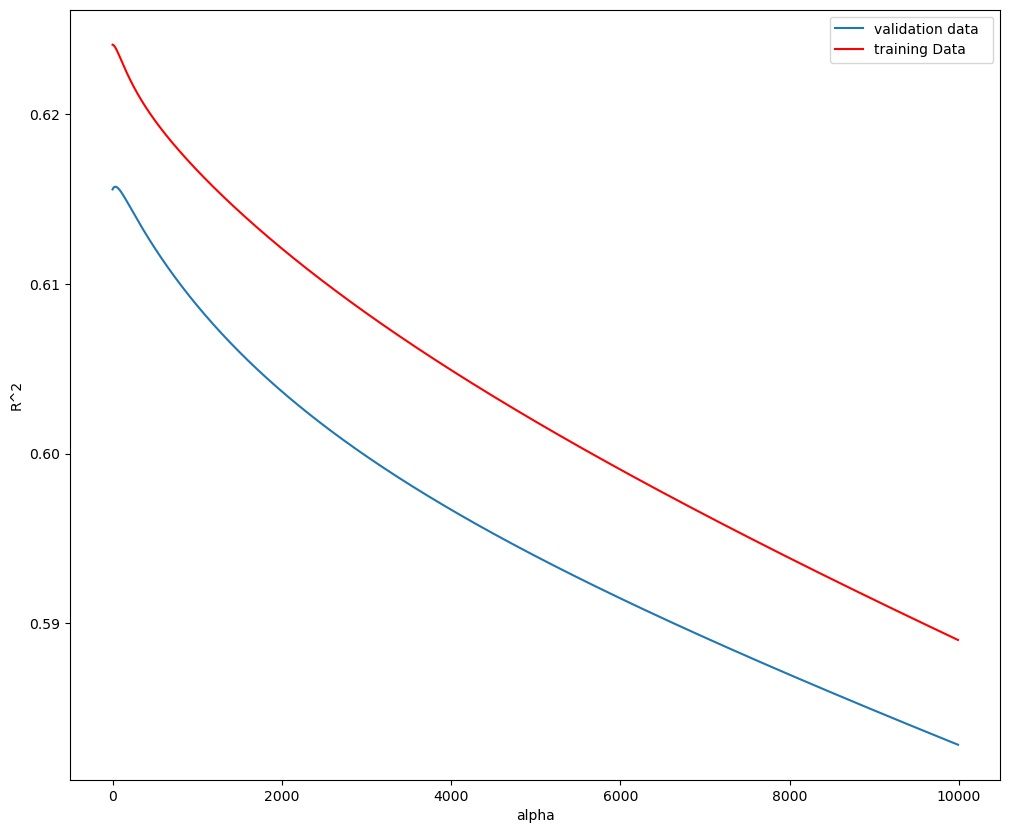

In [216]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [204]:
best_index = np.argmax(Rsqu_test)
best_alpha = Alpha[best_index]
best_R2 = Rsqu_test[best_index]

print("Best R-squared score:", best_R2)
print("Corresponding alpha value:", best_alpha)


Best R-squared score: 0.6157346245371322
Corresponding alpha value: 30


From the calculation R^2 value after apply ridge regression we can get the best alpha for apply in model for be predictor.

### Cross-Validation Score Multivariate Polynomial Function After Apply Ridge Regression

In [224]:
RigeModel_best_alpha = Ridge(alpha = best_alpha)

In [225]:
Rcross_Mul_poly_r = cross_val_score(RigeModel_best_alpha,x_test1_mul_de_3_pr_scaled, y_test1,cv=10)
Rcross_Mul_poly_r

array([0.5229607 , 0.56285302, 0.60665114, 0.63594467, 0.58010118,
       0.5280647 , 0.56778316, 0.62808614, 0.56018657, 0.71945866])

In [226]:
print("The mean of the folds are", Rcross_Mul_poly_r.mean(), "and the standard deviation is", Rcross_Mul_poly_r.std())

The mean of the folds are 0.5912089922531709 and the standard deviation is 0.055795410848471144


## Determining a Good model for price prediction.

0.5714759984334863<p>From we trial with various model for price prediction. We can indicate whice model is good enough for be predictor by R-squared.
</p>
<h4>Let's look at the values from different models</h4>
<p>Simple Linear Regression
<ul>
    <li>R-squared: 0.4832715584837527</li>
    <li>R-squared with cross-validation : 0.4923599986485237</li>
</ul>
</p>
<p>Multiple Linear Regression
<ul>
    <li>R-squared: 0.5376499916783248</li>
    <li>R-squared with cross-validation : 0.5434177110564671</li>
</ul>
</p>

<p>Polynomial Fit
<ul>
    <li>polynomial R-squared: 0.5260814917251495</li>
    <li>polynomial R-squared with cross-validation : 0.4914095503539941</li>
</ul>
</p>

<p>Multivariate Polynomial Function
<ul>
    <li>Multivariate Polynomial R-squared: 0.6157346245371322</li>
    <li>Multivariate Polynomial R-squared with cross-validation and apply ridge regression: 0.5912089922531709 </li>
</ul>
</p>


<h1>Conclusion</h1>
Comparing the model that created by using R-squared we can see <b>Multivariate Polynomial R-squared with cross-validation and apply ridge regression model</b> to be able to predict price from our dataset. Because Multivariate Polynomial have the greatest R-squared value but have to improve because the R^2 value is still not good correlated.

# suggestion
the reason why the R^2 value from predictor have small amount maybe because the data that we have is not efficient for predict price. You can see the correlation of each features with price. The correlation value is small amount, in the good condition for correlation value magnitude are between 0.7 and 0.9 indicate variables which can be considered highly correlated.

## Author

Link.in: <a href="https://www.linkedin.com/in/siwakorn-naratch/">Siwakorn Naratch</a>